## Preprocessing

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# model
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score


import json

# styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

### 1. Importing Dataset

In [2]:
df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
# With sklearn
imp = SimpleImputer(strategy='mean')
df['bmi'] = imp.fit_transform(df[['bmi']])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Encode categorical features

In [6]:
# Select columns which dtype == 'category'
cat_cols = df.select_dtypes(include=['object']).columns
print(f'Categorical columns: {cat_cols}')

# Loop through each categorical column 
for col in cat_cols:

    # create a list of labels to be encoded in the column
    append_to = list(df[col].unique())
 
    # These labels will be use as column headers
    print(append_to)
 
    # Apply OneHotEncoder()
    df[append_to] = OneHotEncoder().fit_transform(df[[col]]).toarray()
 
    # Drop non-encoded column
    df.drop(col, axis=1, inplace=True)
    
    # Drop redundant data
    #df.drop(append_to[0], axis=1, inplace=True)
 

Categorical columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
['Male', 'Female', 'Other']
['Yes', 'No']
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
['Urban', 'Rural']
['formerly smoked', 'never smoked', 'smokes', 'Unknown']


In [7]:
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Female,Other,...,Self-employed,Govt_job,children,Never_worked,Urban,Rural,formerly smoked,never smoked,smokes,Unknown
0,9046,67.0,0,1,228.69,36.600000,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,28.893237,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.500000,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.400000,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.000000,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,44873,81.0,0,0,125.20,40.000000,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,19723,35.0,0,0,82.99,30.600000,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544,51.0,0,0,166.29,25.600000,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Scale numeric features

In [8]:
# Select numerical columns
num_cols = ['age', 'avg_glucose_level', 'bmi']

# Apply MinMaxScaler
minmax = MinMaxScaler()
df[num_cols] = minmax.fit_transform(df[num_cols])
df[num_cols]

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
1,0.743652,0.679023,0.212981
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930
...,...,...,...
5105,0.975586,0.132167,0.212981
5106,0.987793,0.323516,0.340206
5107,0.426270,0.128658,0.232532
5108,0.621582,0.513203,0.175258


In [9]:
from sklearn.model_selection import train_test_split

y = df['stroke']
X  = df
X.drop('stroke', axis=1, inplace=True) 
X.drop('id', axis=1, inplace=True) 

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [11]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,Female,Other,Yes,No,...,Self-employed,Govt_job,children,Never_worked,Urban,Rural,formerly smoked,never smoked,smokes,Unknown
2123,0.304199,0,0,0.365663,0.105384,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
103,0.987793,0,1,0.108854,0.104238,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4149,0.987793,1,1,0.018419,0.119129,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4172,0.169922,0,0,0.025759,0.095074,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3201,0.975586,0,0,0.183917,0.135166,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,0.019043,0,0,0.005032,0.099656,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2118,0.438477,1,0,0.267427,0.237113,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3289,0.536133,0,0,0.143246,0.126002,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2443,0.157715,0,0,0.284000,0.155785,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
oversample = SMOTE() 
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train)

In [13]:
X_train_resh

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,Female,Other,Yes,No,...,Self-employed,Govt_job,children,Never_worked,Urban,Rural,formerly smoked,never smoked,smokes,Unknown
0,0.816895,0,0,0.146986,0.241695,0.000000,1.000000,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.108887,0,0,0.162035,0.096220,1.000000,0.000000,0.0,1.0,0.0,...,0.0,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.707031,1,0,0.151602,0.331042,0.000000,1.000000,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.645996,0,1,0.185163,0.285223,0.000000,1.000000,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.792480,0,1,0.011079,0.212981,1.000000,0.000000,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,0.679259,0,0,0.511009,0.279189,1.000000,0.000000,0.0,0.0,1.0,...,0.0,0.344987,0.655013,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6238,0.960473,1,0,0.444255,0.360548,1.000000,0.000000,0.0,1.0,0.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6239,0.984685,0,0,0.195917,0.133738,0.915122,0.084878,0.0,0.0,1.0,...,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6240,0.801858,0,0,0.214475,0.179703,0.000000,1.000000,0.0,0.0,1.0,...,0.0,0.000000,0.417534,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,Female,Other,Yes,No,...,Self-employed,Govt_job,children,Never_worked,Urban,Rural,formerly smoked,never smoked,smokes,Unknown
4697,0.816895,0,0,0.146986,0.241695,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2946,0.108887,0,0,0.162035,0.096220,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
250,0.707031,1,0,0.151602,0.331042,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4197,0.645996,0,1,0.185163,0.285223,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4561,0.792480,0,1,0.011079,0.212981,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,0.291992,0,0,0.129166,0.368843,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4990,0.047852,0,0,0.142000,0.084765,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1498,0.462891,0,0,0.146524,0.300115,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2779,0.072266,0,0,0.133783,0.108820,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [15]:
# Without crossfold validation
rf = RandomForestClassifier(random_state=42).fit(X_train_resh, y_train_resh)
rf.score(X_test, y_test)

0.8801955990220048

# Modeling

## GDT from Sascha

In [16]:
from utilities.GDT import *
from utilities.utilities_GDT import *

In [17]:
config = {
    'gdt': {
        'depth': 6,
        
        'learning_rate_index': 0.05,
        'learning_rate_values': 0.01,
        'learning_rate_leaf': 0.005,
        
        'split_index_activation': 'entmax',
                
        'optimizer': 'adam', 
        
        'initializer': 'GlorotUniform', #dataAware
        
        'dropout': 0,
        
        'batch_size': 256,#512,
        'epochs': 5000,
        
        'loss': 'binary_focal_crossentropy', #binary_focal_crossentropy, binary_crossentropy
        
        'focalLossGamma': 3,
        
        'polyLoss': False,
        'polyLossEpsilon': 2,
        
        'restarts': 3,
        'restart_type': 'loss', #'loss', 'metric'
        
        'early_stopping_epochs': 200,
        'early_stopping_type': 'loss', #'loss', 'metric'
        'early_stopping_epsilon': 0.0,
    },
    
    'preprocessing': {
        'balance_threshold': 0.25,#.25, #if minclass fraction less than threshold/num_classes-1 | #0=no rebalance, 1=rebalance all
        'normalization_technique': 'quantile', #'min-max'
        'quantile_noise': 1e-3,
    },

    'computation': {
        'random_seed': 42,
        'trials': 10, 
        
        'use_best_hpo_result': False,
        'hpo_path': '_DEFAULT',
        
        'force_depth': False,
        'force_dropout': False,
        'force_restart': True,   
        
        'use_gpu': True,
        'gpu_numbers': '0',#'1',
        'n_jobs': 20,
        'verbosity': 0,
        
        'hpo': None,#'binary', #'binary', 'multi', 'regression'
        'search_iterations': 300,
        'cv_num': 3,     
        
        'metrics_class': ['f1', 'roc_auc', 'accuracy'],
        'metrics_reg': ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
        
        'eval_metric_class': ['f1', 'roc_auc', 'accuracy'], #f1 accuracy
        'eval_metric_reg': 'r2', #r2 mae        
        
        
    },
    
    'benchmarks': {
        'DNDT': True,
        'GeneticTree': True,
        'DL85': True,
        
        'sklearn': True,
        
        'NeuralNetwork': False,
    }
}

In [18]:
dataset_dict = {
           'X_train': X_train_resh,
           'y_train': y_train_resh,
           'X_valid': X_valid,
           'y_valid': y_valid,
           'X_test': X_test,
           'y_test': y_test,
           'normalizer_list': ""
           }

In [19]:
def prepare_training(identifier, dataset_dict, config):
    
    tf.random.set_seed(config['computation']['random_seed'])
    np.random.seed(config['computation']['random_seed'])
    random.seed(config['computation']['random_seed'])
    tf.keras.utils.set_random_seed(config['computation']['random_seed'])

    config_test = deepcopy(config)


    if 'REG' not in identifier:
        config_test['gdt']['objective'] = 'classification'
        config_test['gdt']['normalize'] = None
        metrics = config_test['computation']['metrics_class']
    else:
        config_test['gdt']['objective'] = 'regression'
        if 'normalize' not in config_test['gdt']:
            config_test['gdt']['normalize'] = 'mean'     #

        metrics = config_test['computation']['metrics_reg']

    dataset_dict = dataset_dict #et_preprocessed_dataset(identifier,
                                #            random_seed=config_test['computation']['random_seed'],
                                #            config=config_test,
                                #            verbosity=0)


    number_of_classes = len(np.unique(np.concatenate([dataset_dict['y_train'].values, dataset_dict['y_valid'].values, dataset_dict['y_test'].values])))


    dataset_dict['number_of_classes'] = number_of_classes

    dataset_dict['number_of_variables'] = dataset_dict['X_train'].shape[1]

    return dataset_dict, config_test, metrics

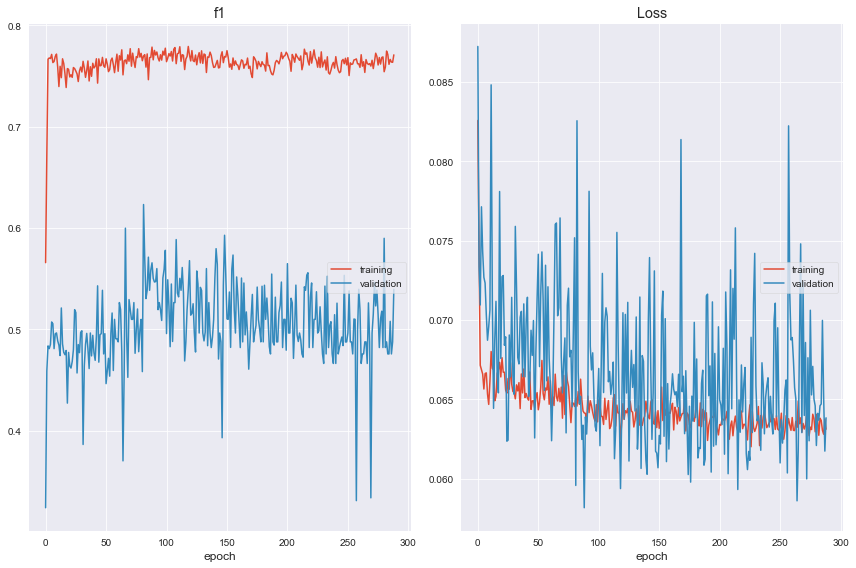

f1
	training         	 (min:    0.566, max:    0.779, cur:    0.771)
	validation       	 (min:    0.324, max:    0.623, cur:    0.540)
Loss
	training         	 (min:    0.062, max:    0.083, cur:    0.063)
	validation       	 (min:    0.058, max:    0.087, cur:    0.064)


In [20]:
import tensorflow as tf
import random
from copy import deepcopy
dataset_dict, config_training, metrics = prepare_training(identifier = 'BIN:Spambase', dataset_dict = dataset_dict, config = config)
    
model_dict = {}
    
verbosity = 1

model = GDT(number_of_variables = dataset_dict['number_of_variables'],
                number_of_classes = dataset_dict['number_of_classes'],
                
                objective = config_training['gdt']['objective'],
                
                depth = config_training['gdt']['depth'],
                
                learning_rate_index = config_training['gdt']['learning_rate_index'],
                learning_rate_values = config_training['gdt']['learning_rate_values'],
                learning_rate_leaf = config_training['gdt']['learning_rate_leaf'],
                                                        
                split_index_activation = config_training['gdt']['split_index_activation'],
                dropout = config_training['gdt']['dropout'],
                            
                optimizer = config_training['gdt']['optimizer'],

                loss = config_training['gdt']['loss'],
                            
                focalLossGamma = config_training['gdt']['focalLossGamma'],    
                      
                polyLoss = config_training['gdt']['polyLoss'],    
                polyLossEpsilon = config_training['gdt']['polyLossEpsilon'],    

                initializer = config_training['gdt']['initializer'],     

                random_seed = config_training['computation']['random_seed'],
                verbosity = verbosity)#5  

model.fit(dataset_dict['X_train'],
              dataset_dict['y_train'],

              batch_size=config_training['gdt']['batch_size'], 
              epochs=config_training['gdt']['epochs'], 

              restarts = 0,#config_training['gdt']['restarts'], 
              #restart_type=config_training['gdt']['restart_type'], 

              early_stopping_epochs=config_training['gdt']['early_stopping_epochs'], 
              early_stopping_type=config_training['gdt']['early_stopping_type'],

              valid_data=(dataset_dict['X_valid'], dataset_dict['y_valid']))